In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:
img = cv2.imread("D:\stich.jpg", cv2.IMREAD_GRAYSCALE)
sum = 0
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        _intensity = img[i, j]
        if  _intensity > 200:
            sum+=1
print (sum * 100/(img.shape[0]*img.shape[1]), "%")
print (img.shape[0], img.shape[1])
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

3.5049416914606204 %
855 855


In [37]:
img = cv2.imread("D:\cat.png")
cv2.circle(img,(165, 137), 20, (0,0,255), 4)
cv2.line??
cv2.line (img, (164, 50), (225, 9), (153, 132, 12), 4, 8)
cv2.line (img, (225, 9), (225, 93), (153, 132, 12), 4)
cv2.line (img, (164, 50), (225, 93), (153, 132, 12), 4)
ret, p1, p2 = cv2.clipLine((0, 0, 100, 100), (0, 0), (300, 300))
cv2.imshow("Image", img)
cv2.imwrite("D:\cat1.png", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
img = cv2.imread("D:\sonnet.png", 0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

cv2.imshow("Imag", img)
cv2.imshow("Image", th3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
image = cv2.imread("D:\lena.png", 0)
# new_image = np.zeros(image.shape, image.dtype)
alpha = 2.0 
beta = -100    

print(' Basic Linear Transforms ')
print('-------------------------')
try:
    alpha = float(input('* Enter the alpha value : '))
    beta = int(input('* Enter the beta value: '))
except ValueError:
    print('Error, not a number')
new_image = cv2.convertScaleAbs(image, alpha, beta)
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
cv2.imshow("Orig Image", image)
cv2.imshow("New Image", new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

 Basic Linear Transforms 
-------------------------
* Enter the alpha value : 2
* Enter the beta value: 50


NameError: name 'cv' is not defined

In [4]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)
image = cv2.imread("D:\lena.png", 0)
gamma_corrected = adjust_gamma(image, 3)
cv2.imshow("Orig Image", image)
cv2.imshow("New Image", gamma_corrected) 
cv2.waitKey(0)
cv2.destroyAllWindows()

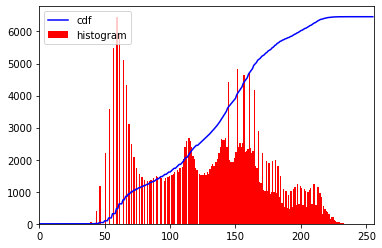

In [7]:
img = cv2.imread("D:\lena.png", 0)
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
cv2.imshow("Orig Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread("D:\lena.png",0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
# cv2.imwrite('res.png',res)
# cv2.imshow("Orig Image", img)
cv2.imshow("New Image", res) 
cv2.waitKey(0)
cv2.destroyAllWindows()

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
hist,bins = np.histogram(res.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(res.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
img = cv2.imread('D:\lena.png',0)
# img = cv2.imread('D:\shapes.png',0)
edges = cv2.Canny(img,100,200)
cv2.imshow("Image", img)
cv2.imshow("Imag", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# img = cv2.imread('D:\krug.png',0)
img = cv2.imread('D:\sq.png',0)
# img = cv2.imread("D:\bumer.jpg",0)
# img = cv2.imread("D:\moon.jpg",0)
edges = cv2.Canny(img,100,200)

x = img.shape[0]
y = img.shape[1]

indices = np.where(edges != [0])
# coordinates = zip(indices[0], indices[1])
# print(coordinates)
xsize = np.amax(indices[0]) - np.amin(indices[0])
ysize = np.amax(indices[1]) - np.amin(indices[1])
print(xsize, ysize)
print (indices[0][0])
if xsize - ysize <= 10:
#     square, cyrcle, triangle
    x1 = round((indices[0].size)/4)
    x2 = round((indices[0].size)/7)
    y1 = round(indices[1].size/4)
    y2  = round((indices[1].size/7))
    if abs(indices[0][x1] - indices[0][x2]) == abs(indices[1][y1] - indices[1][y2])  :
        print ("cyrcle")
    elif indices[0].count(indices[0][0]) > 20 and indices[1].count(indices[1][0]) > 20:
        print("square")
    
    
# coordinates = zip(indices[0], indices[1])
# for i in coordinates

cv2.imshow("Image", img)
cv2.imshow("Imag", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

131 139
154


AttributeError: 'numpy.ndarray' object has no attribute 'count'

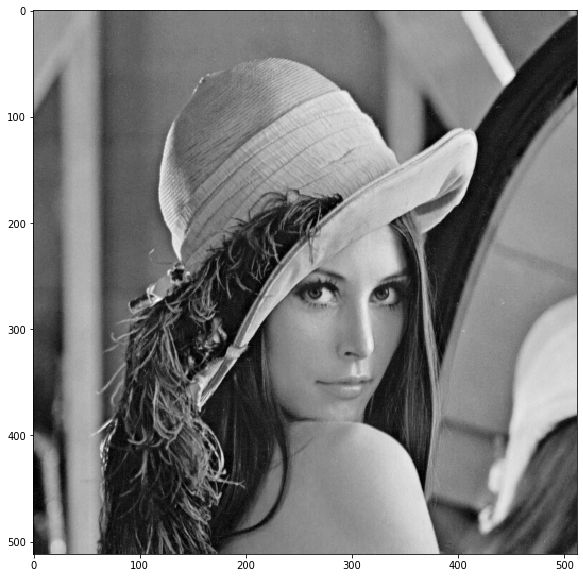

In [2]:
img = cv2.imread("D:\lena.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

 Noize lvl 
-------------------------
* Enter the lvl : 100


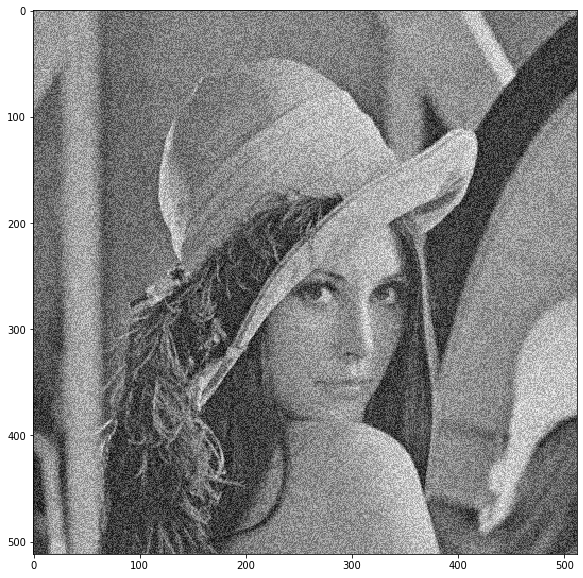

In [6]:
img = cv2.imread("D:\lena.png", cv2.IMREAD_GRAYSCALE)

print(' Noize lvl ')
print('-------------------------')
try:
    lvl = int(input('* Enter the lvl : '))
except ValueError:
    print('Error, not a number')
images=[]
n = 10
result = 0
for i in range(n):
    filtered = img + np.random.uniform(0, lvl, (img.shape[0], img.shape[1]))
    images.append(filtered)
result = images[0]
for i in images:
    result += i
new = (result)/(n+1)
# fig, (ax1, ax2, ax3) = 
plt.figure(figsize=(10,10))
plt.imshow(filtered, cmap='gray')
# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

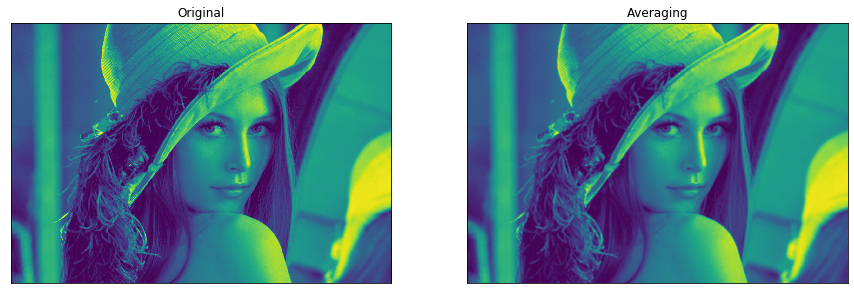

In [15]:
img = cv2.imread("D:\Lena.jpg", cv2.IMREAD_GRAYSCALE)

# plt.figure(figsize=(10,10))
# plt.imshow(filtered, cmap='gray')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
# plt.figure(figsize=(10,10))
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

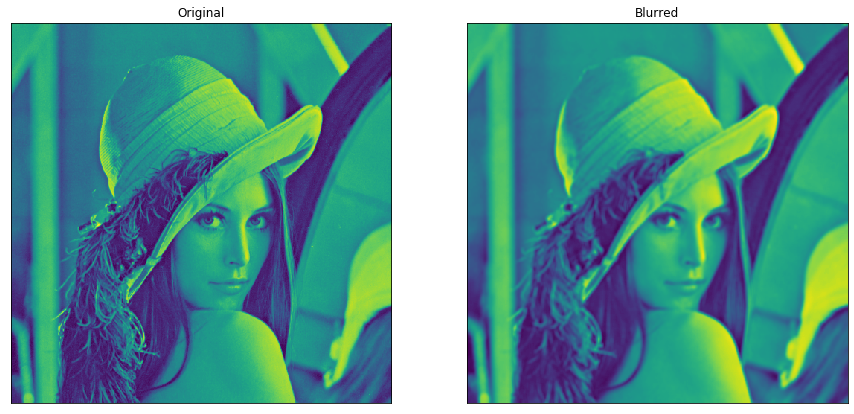

In [17]:
img = cv2.imread("D:\lena.png", cv2.IMREAD_GRAYSCALE)

blur = cv2.blur(img,(5,5))
plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

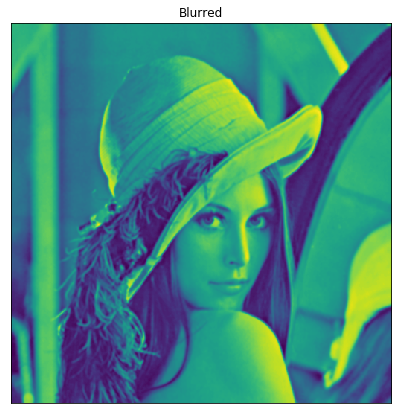

In [20]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.figure(figsize=(15,15))
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

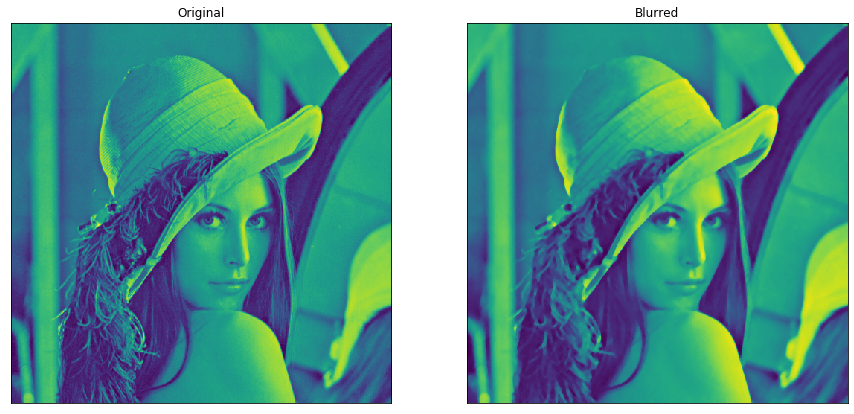

In [23]:
median = cv2.medianBlur(img,5)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

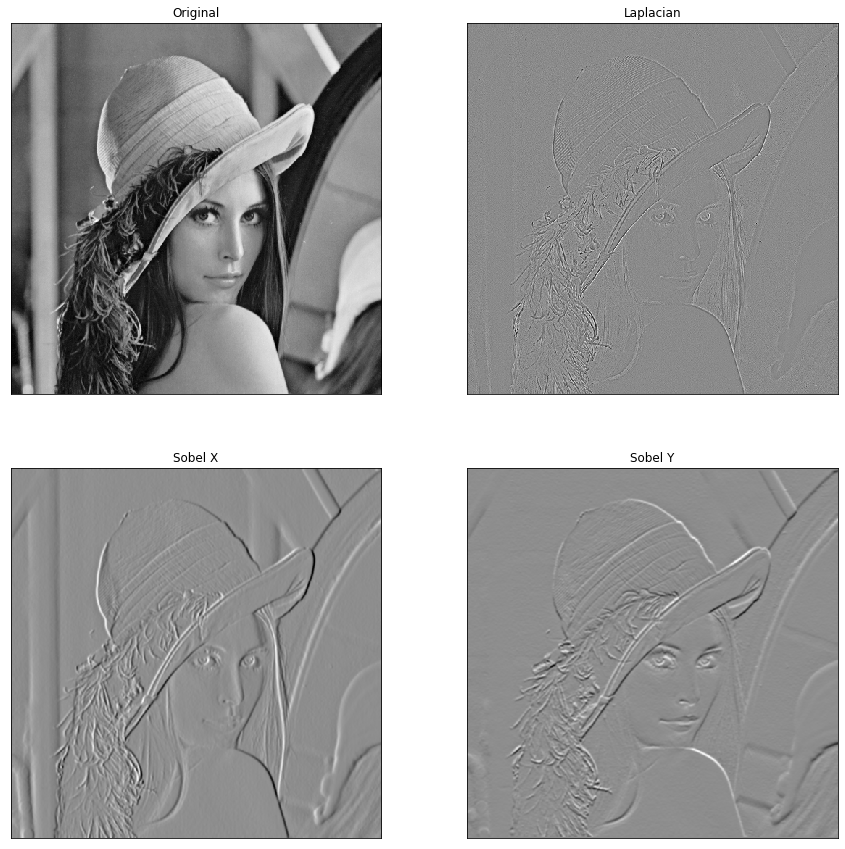

In [2]:
img = cv2.imread("D:\lena.png", cv2.IMREAD_GRAYSCALE)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [35]:
# img = cv2.imread("D:\Lena.jpg")
# # img = cv2.imread("D:\lena.png", cv2.IMREAD_GRAYSCALE)
# tmp = img.copy()
# cv2.randn(tmp,(0,0,0),(50,50,50));
# img += tmp
# kernel = np.ones((5,5),np.float32)/25
# dst = cv2.filter2D(img,-1,kernel)
# plt.figure(figsize=(15,15))
# plt.subplot(121),plt.imshow(img),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122), plt.imshow(blur),plt.title('Blurred')
# plt.xticks([]), plt.yticks([])
# plt.show()

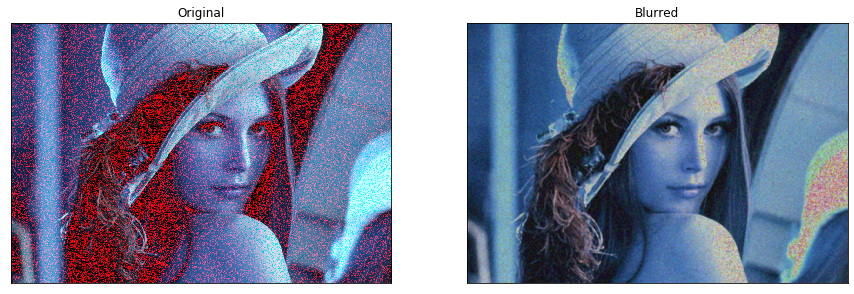

In [33]:
img = cv2.imread("D:\Lena.jpg")
# img = cv2.imread("D:\lena.png", cv2.IMREAD_GRAYSCALE)
tmp = img.copy()
cv2.randu(tmp, 0, 510)
img += tmp
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

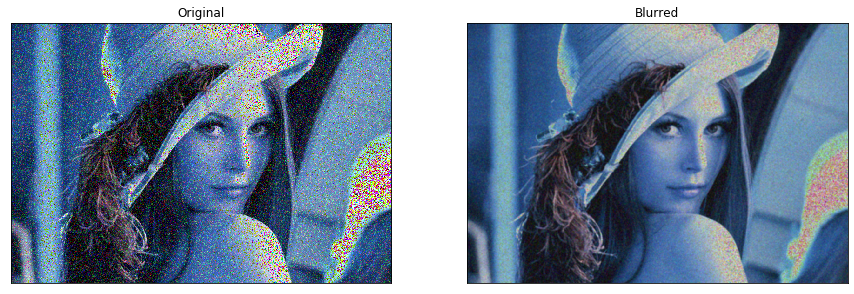

In [29]:
img = cv2.imread("D:\Lena.jpg")
tmp = img.copy()
cv2.randn(tmp,(0,0,0),(50,50,50));
img += tmp
blur = cv2.blur(img,(5,5))
plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

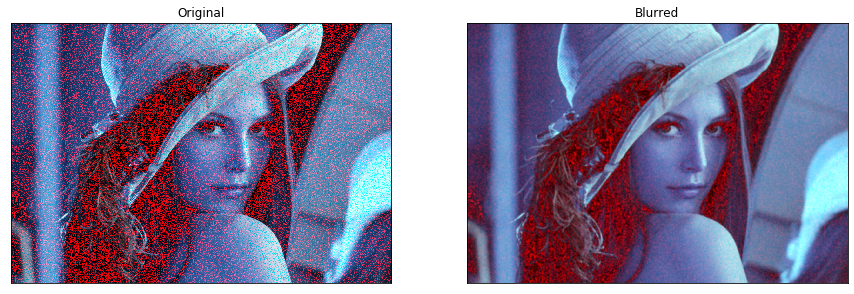

In [34]:
img = cv2.imread("D:\Lena.jpg")
tmp = img.copy()
cv2.randu(tmp, 0, 510)
img += tmp
blur = cv2.blur(img,(5,5))
plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

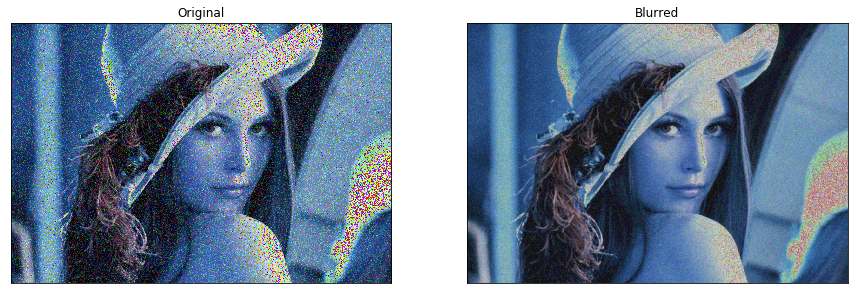

In [36]:
img = cv2.imread("D:\Lena.jpg")
tmp = img.copy()
cv2.randn(tmp,(0,0,0),(50,50,50));
img += tmp
blur = cv2.GaussianBlur(img,(5,5),0)
plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

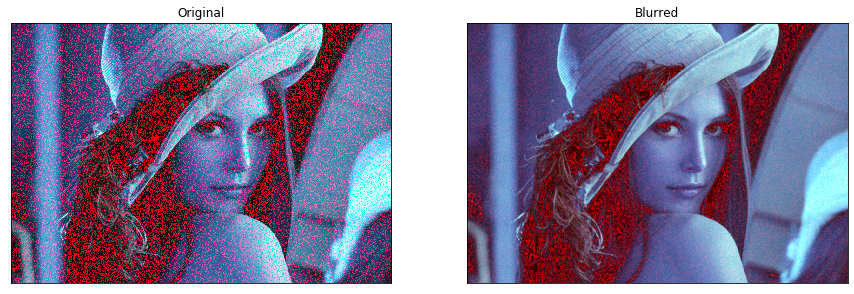

In [37]:
img = cv2.imread("D:\Lena.jpg")
tmp = img.copy()
cv2.randu(tmp, 0, 510)
img += tmp
blur = cv2.GaussianBlur(img,(5,5),0)
plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

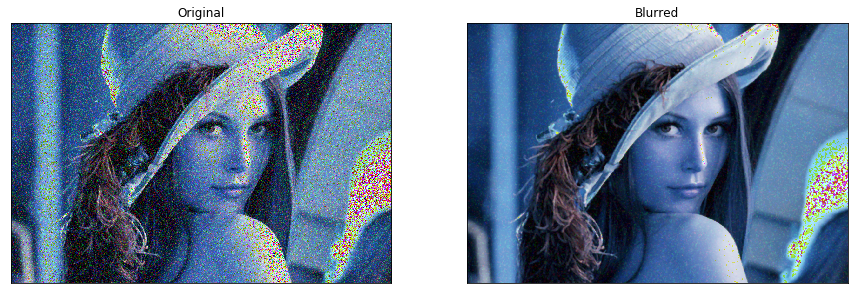

In [38]:
img = cv2.imread("D:\Lena.jpg")
tmp = img.copy()
cv2.randn(tmp,(0,0,0),(50,50,50));
img += tmp
blur =  cv2.medianBlur(img,5)
plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

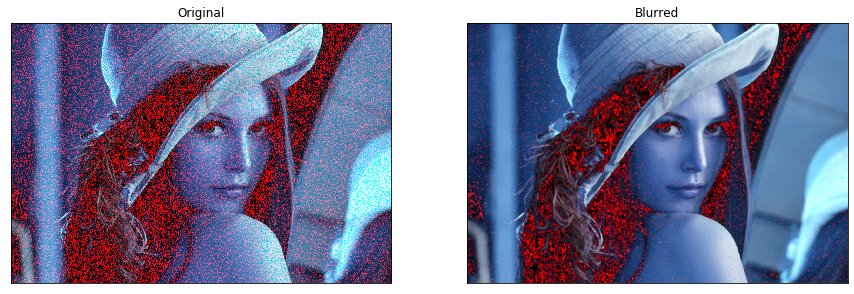

In [39]:
img = cv2.imread("D:\Lena.jpg")
tmp = img.copy()
cv2.randu(tmp, 0, 510)
img += tmp
blur =  cv2.medianBlur(img,5)
plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

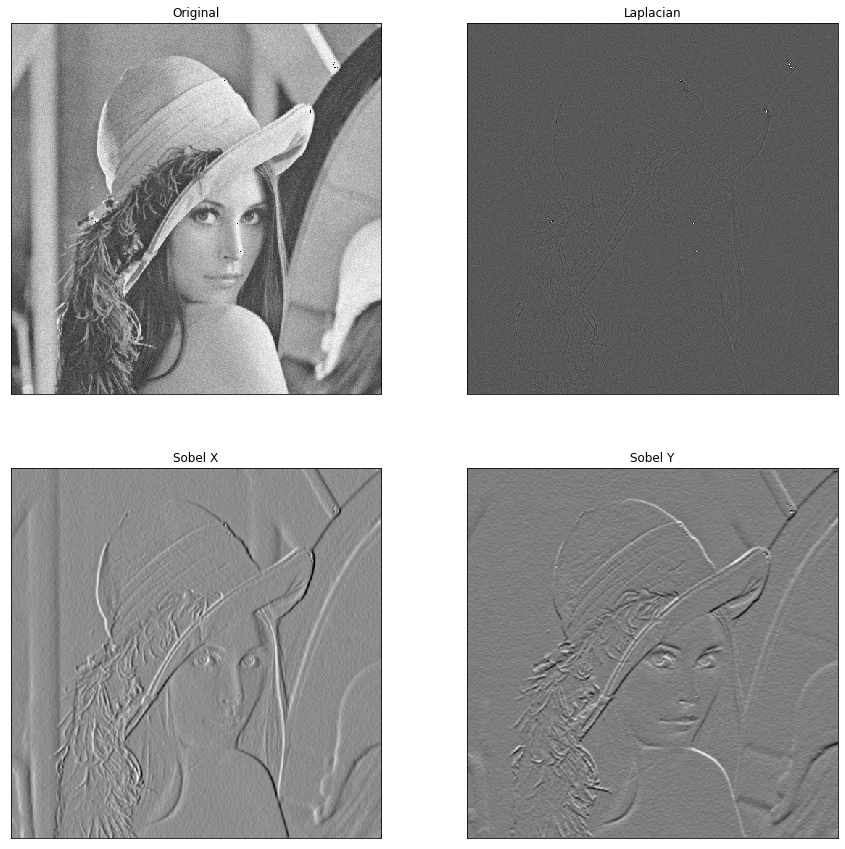

In [3]:
img = cv2.imread("D:\lena.png", cv2.IMREAD_GRAYSCALE)
tmp = img.copy()
cv2.randu(tmp, 0, 30)
img += tmp
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()